In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np  

In [ ]:
df = pd.read_csv('Driver-Behavioural-Profiling\\data\\driver_behavior.csv')
df.head()

,Driver,SpeedMean,SpeedMax,ThrottleStd,BrakePct,GearChanges
0,VER,242.627832,329.0,41.214540,0.158576,7
1,GAS,241.924837,326.0,39.259665,0.137255,7
2,PER,245.226415,331.0,40.509323,0.166667,7
3,ALO,240.147239,334.0,38.947464,0.141104,7
4,LEC,240.632588,340.0,38.745976,0.150160,7


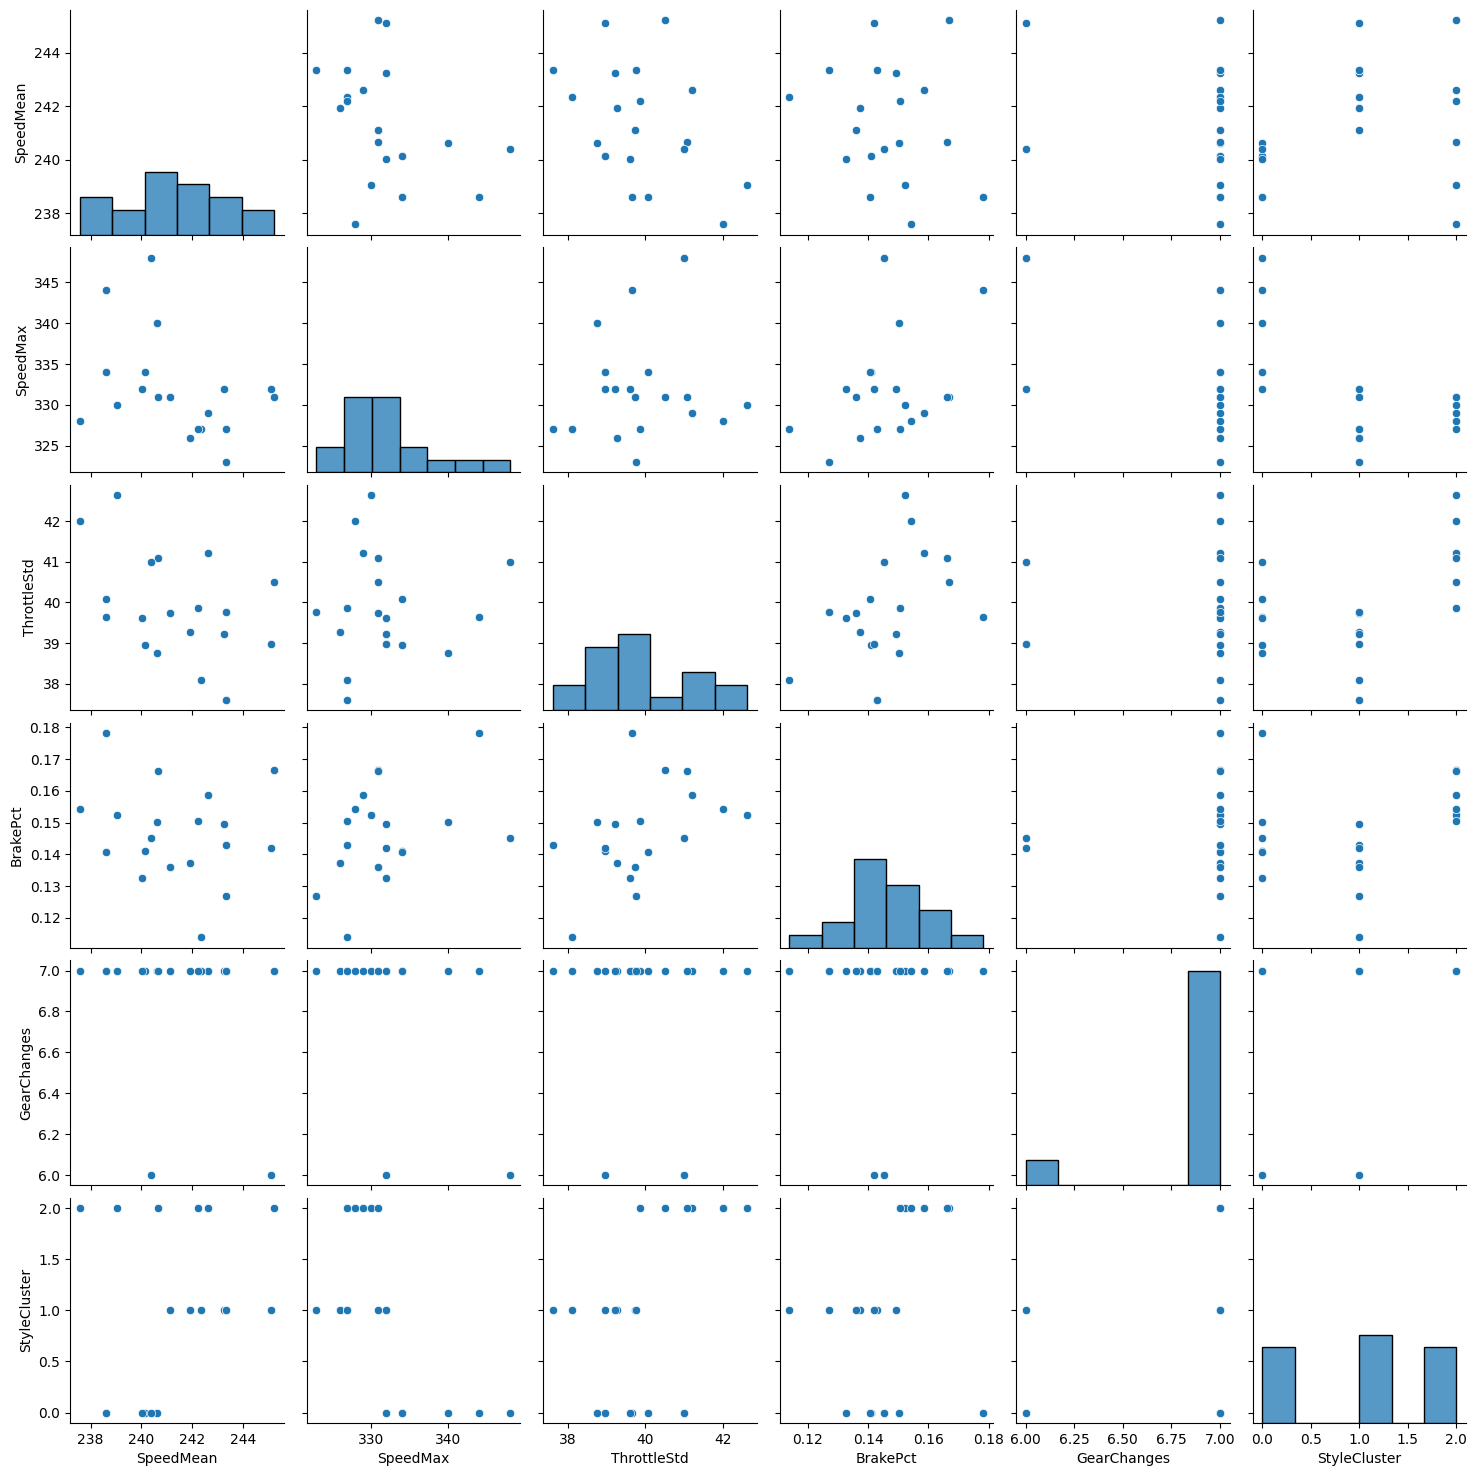

In [ ]:
sns.pairplot(df.drop(columns='Driver'))


In [51]:
X = df.drop(columns='Driver')
ssc = StandardScaler()

X_scaled = ssc.fit_transform(X)

In [52]:
# Remove NaNs and infinite values
df = df.replace([np.inf, -np.inf], np.nan).dropna()

# Hard limits to avoid absurd plot sizes
df = df[
    (df['SpeedMean'] > 0) & (df['SpeedMean'] < 400) &
    (df['ThrottleStd'] > 0) & (df['ThrottleStd'] < 100)
]


In [53]:
kmeans = KMeans(n_clusters=3, random_state= 42).fit(X_scaled)
df['StyleCluster'] = kmeans.labels_

In [54]:
print(df[['Driver', 'SpeedMean', 'ThrottleStd', 'StyleCluster']].head())


  Driver   SpeedMean  ThrottleStd  StyleCluster
0    VER  242.627832    41.214540             2
1    GAS  241.924837    39.259665             1
2    PER  245.226415    40.509323             2
3    ALO  240.147239    38.947464             0
4    LEC  240.632588    38.745976             0


C:\Users\kirth\AppData\Local\Temp\ipykernel_21620\3757025213.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_drivers = df.groupby('StyleCluster').apply(


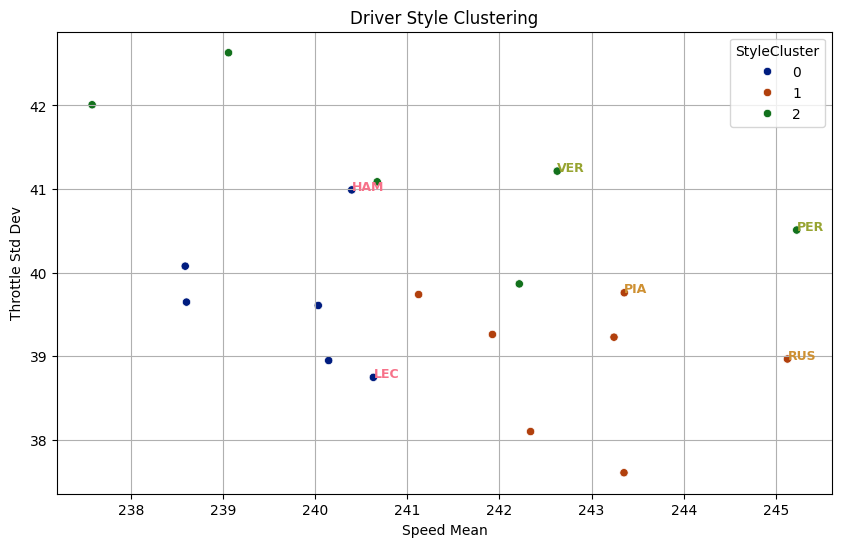

In [ ]:

# Pick top 2 drivers per cluster by SpeedMean
top_drivers = df.groupby('StyleCluster').apply(
    lambda x: x.nlargest(2, 'SpeedMean')
).reset_index(drop=True)


plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df,
    x='SpeedMean',
    y='ThrottleStd',
    hue='StyleCluster',
    palette='dark'
)

for _, row in top_drivers.iterrows():
    plt.text(
        row['SpeedMean'], row['ThrottleStd'], row['Driver'],
        color=sns.color_palette("husl", 8)[int(row['StyleCluster'])],
        fontsize=9, weight='bold'
    )

plt.xlabel("Speed Mean")
plt.ylabel("Throttle Std Dev")
plt.title("Driver Style Clustering")
plt.grid(True)

plt.show()